In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
data = pd.read_csv('/content/archive.zip')
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlor

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive

# Attempting to unmount first to resolve potential conflicts
try:
  drive.flush_and_unmount()
  print('Drive unmounted successfully.')
except ValueError:
  pass  # Ignore if drive is not already mounted

# Mounting with force_remount=True to override any existing mounts
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Drive unmounted successfully.
Mounted at /content/drive


In [ ]:
# Summary statistics
print(data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [ ]:
# Check for duplicates
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If needed, drop duplicates
data = data.drop_duplicates()


Number of duplicate rows: 0


In [ ]:
# List columns and their data types
print(data.columns)
print(data.dtypes)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


Data Preprocessing

In [ ]:
print(data.isnull().sum())
data = data.dropna()
print(data.describe())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         

Future Engineering

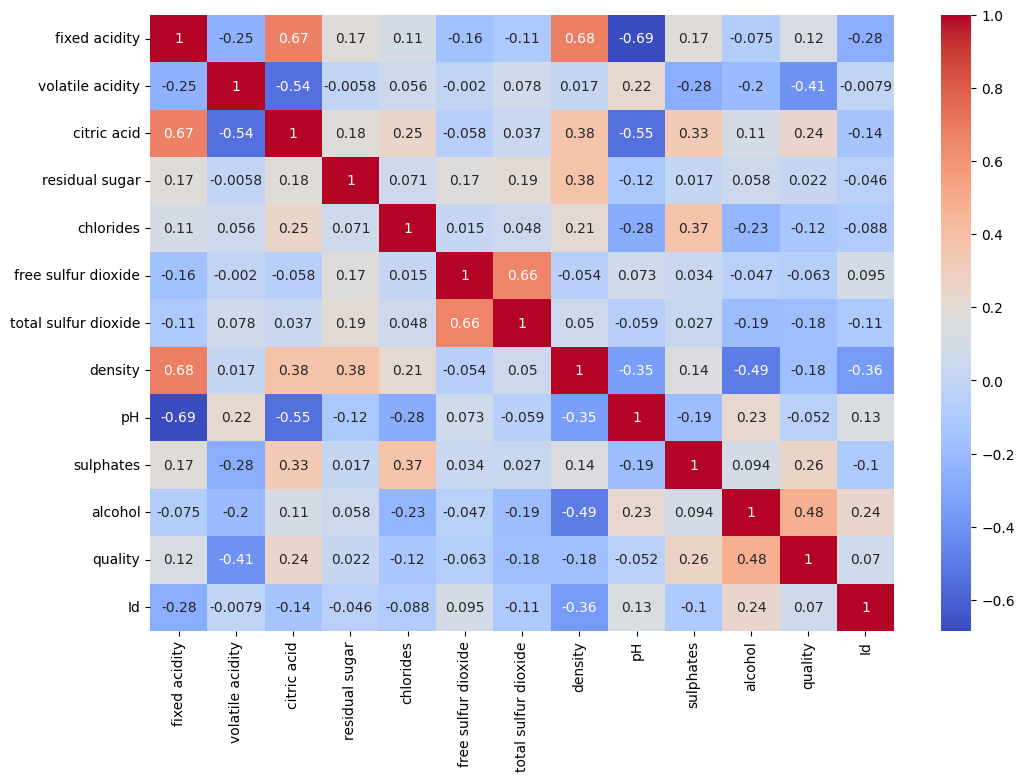

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Splitting the dataset into features and target variable
X = data.drop(columns=['quality', 'Id'])  # Features
y = data['quality']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Test Split

Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)


Model Training

In [ ]:
# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")


Root Mean Squared Error: 0.5458689639136779
R^2 Score: 0.46453299294085415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained your model and made predictions:
# y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False for RMSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.2979729257641922
Root Mean Squared Error: 0.5458689639136779
R^2 Score: 0.46453299294085415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.38345901122052894


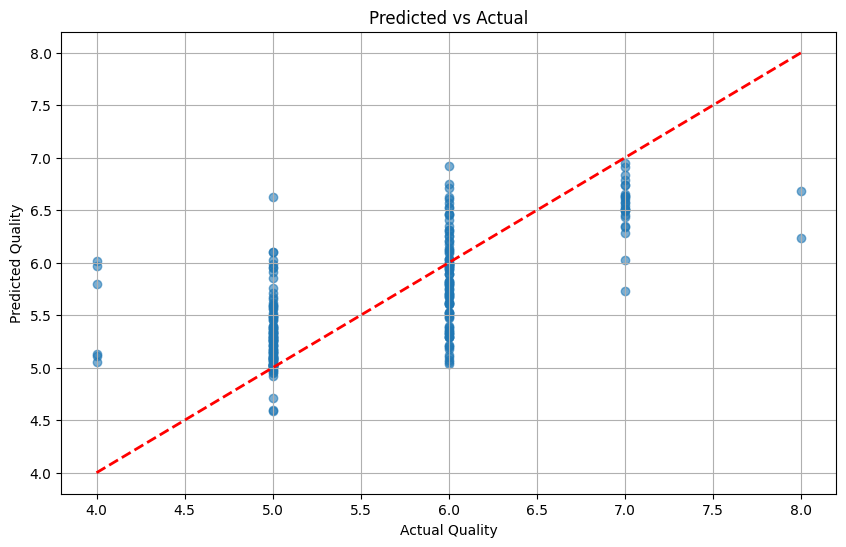

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Line of equality
plt.title('Predicted vs Actual')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.grid()
plt.show()

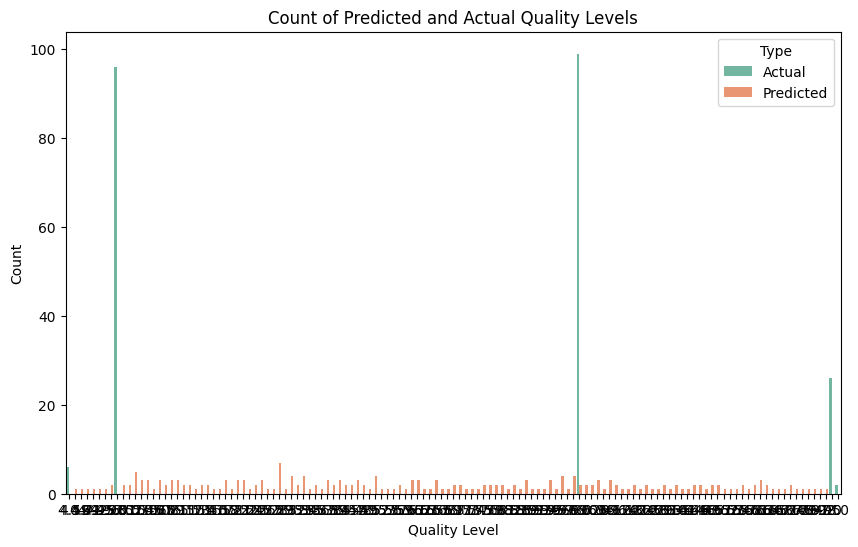

In [ ]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Melt the DataFrame for better visualization
results_melted = results.melt(var_name='Type', value_name='Quality')

# Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=results_melted, x='Quality', hue='Type', palette='Set2')
plt.title('Count of Predicted and Actual Quality Levels')
plt.xlabel('Quality Level')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

 Saving and Testing the Model

In [ ]:
import joblib
joblib.dump(grid_search.best_estimator_, 'wine_quality_model.pkl')
loaded_model = joblib.load('wine_quality_model.pkl')
new_data = X_test.iloc[:1]
new_prediction = loaded_model.predict(new_data)
print("Prediction for new data:", new_prediction)


Prediction for new data: [5.255]


<ipython-input-33-c21ecb0598e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='quality', palette='Set2')


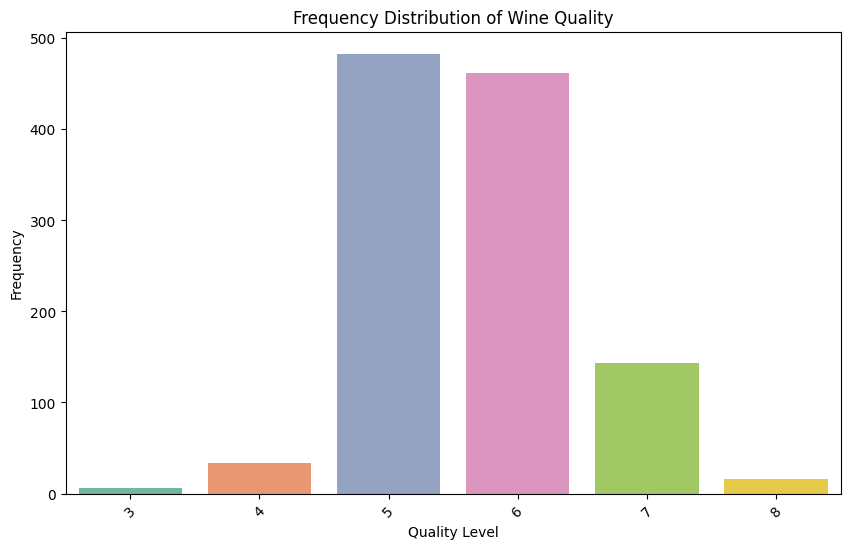

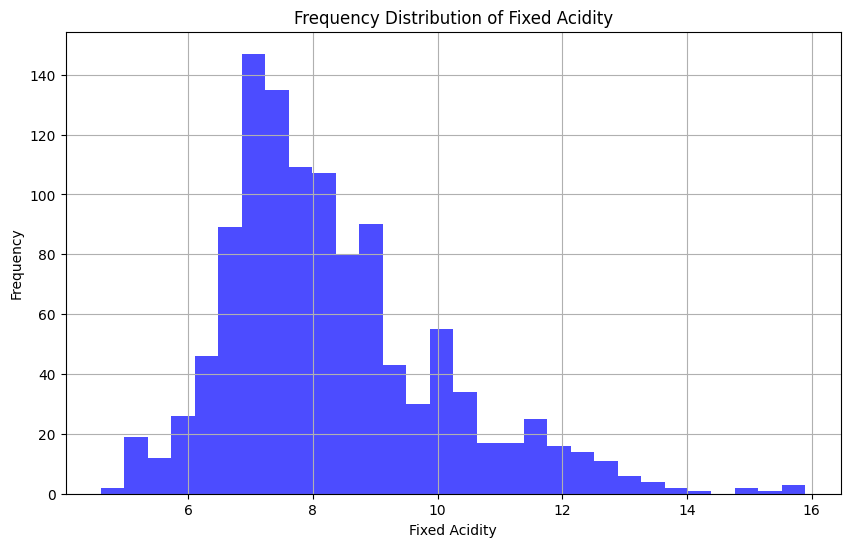

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the target variable 'quality'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='quality', palette='Set2')
plt.title('Frequency Distribution of Wine Quality')
plt.xlabel('Quality Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Histogram for a specific feature (e.g., 'fixed acidity')
plt.figure(figsize=(10, 6))
plt.hist(data['fixed acidity'], bins=30, color='blue', alpha=0.7)
plt.title('Frequency Distribution of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  # Example for regression tasks

# Split the dataset into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train_split, y_train_split)

# Evaluate on validation set
y_val_pred = model.predict(X_val_split)
val_loss = mean_squared_error(y_val_split, y_val_pred)  # Example metric
print(f"Validation Loss: {val_loss}")

# Optional: Log metrics over multiple iterations manually (if you need "epochs")
epochs = 100
for epoch in range(epochs):
    model.fit(X_train_split, y_train_split)  # Refitting with the same data (not typical for random forests)
    y_val_pred = model.predict(X_val_split)
    val_loss = mean_squared_error(y_val_split, y_val_pred)
    print(f"Epoch {epoch + 1}/{epochs} - Validation Loss: {val_loss}")


Validation Loss: 0.4383344262295082
Epoch 1/100 - Validation Loss: 0.4383344262295082
Epoch 2/100 - Validation Loss: 0.4383344262295082
Epoch 3/100 - Validation Loss: 0.4383344262295082
Epoch 4/100 - Validation Loss: 0.4383344262295082
Epoch 5/100 - Validation Loss: 0.4383344262295082
Epoch 6/100 - Validation Loss: 0.4383344262295082
Epoch 7/100 - Validation Loss: 0.4383344262295082
Epoch 8/100 - Validation Loss: 0.4383344262295082
Epoch 9/100 - Validation Loss: 0.4383344262295082
Epoch 10/100 - Validation Loss: 0.4383344262295082
Epoch 11/100 - Validation Loss: 0.4383344262295082
Epoch 12/100 - Validation Loss: 0.4383344262295082
Epoch 13/100 - Validation Loss: 0.4383344262295082
Epoch 14/100 - Validation Loss: 0.4383344262295082
Epoch 15/100 - Validation Loss: 0.4383344262295082
Epoch 16/100 - Validation Loss: 0.4383344262295082
Epoch 17/100 - Validation Loss: 0.4383344262295082
Epoch 18/100 - Validation Loss: 0.4383344262295082
Epoch 19/100 - Validation Loss: 0.4383344262295082
Epoc